# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [49]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

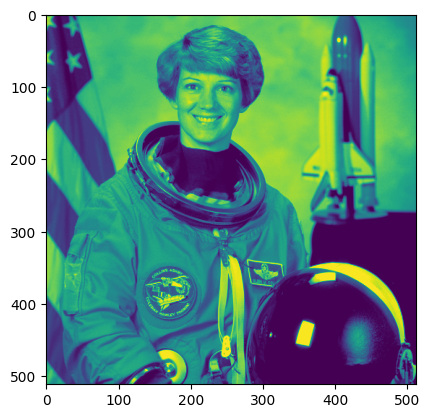

In [50]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [51]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n < img.shape[0] and p[1]+n < img.shape[1]:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img[p[0]-n+q[0],p[1]-n+q[1]]
            count = size*size
            result[p] = neighborhood_sum/count
    return result

   

In [52]:
#altermative zu 3.1.2
#def meanfilter(img, size):
    #result = numpy.zeros(img.shape)
    #n = (size - 1) // 2
    #for p in numpy.ndindex(img.shape):
        #if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            #continue
        #neighborhood_sum = 0
        #for q in numpy.ndindex(size, size):
            #y=p[0]-n+q[0]
            #x=P[1]-q[1]
            #neighborhood_sum = neighborhood_sum + img[y,x]
        #mean = neighborhood_sum/(size+size) 
        #result[p] = mean
    #return result


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

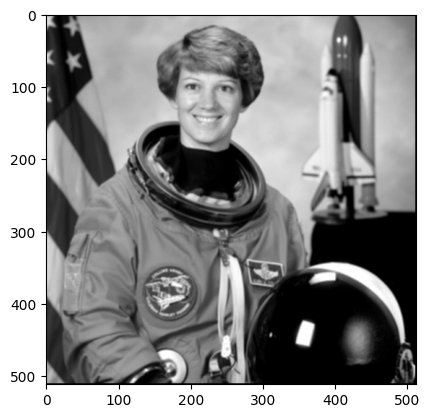

In [53]:
plt.imshow(meanfilter(img, 3),'grey')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [54]:
img1 = plt.imread('data/astronaut_meanfilter5.png')
img2 = meanfilter(img, 5)
assert numpy.allclose(img1, img2, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [63]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        data = list()
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n < img.shape[0] and p[1]+n < img.shape[1]:
            for q in numpy.ndindex(size, size):
                data.append(img[p[0]-n+q[0],p[1]-n+q[1]])
            data.sort()
            i = len(data) // 2  # Position/Index des mittleren Elements
            median = data[i]    # Wert an der Stelle "i" in "data" (Wert des mittleren Elements)
            result[p] = median  # ...dieser Wert wird in den Pixel mit Koordinaten "p" geschrieben
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

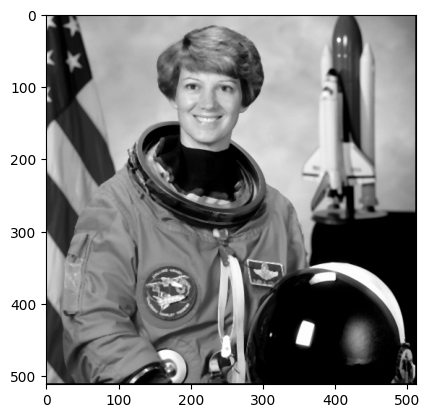

In [64]:
plt.imshow(medianfilter(img, 3),'grey')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [66]:
img1 = plt.imread('data/astronaut_medianfilter5.png')
img2 = medianfilter(img, 5)
assert numpy.allclose(img1, img2, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [67]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

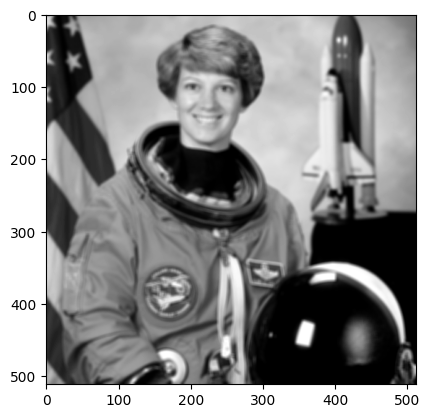

In [68]:
imgu = scipy.ndimage.uniform_filter(img, 5)
plt.imshow(imgu, 'grey')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

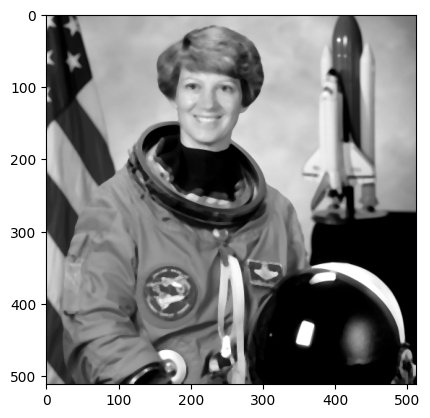

In [70]:
imgm = scipy.ndimage.median_filter(img, 5)
plt.imshow(imgm, 'grey')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

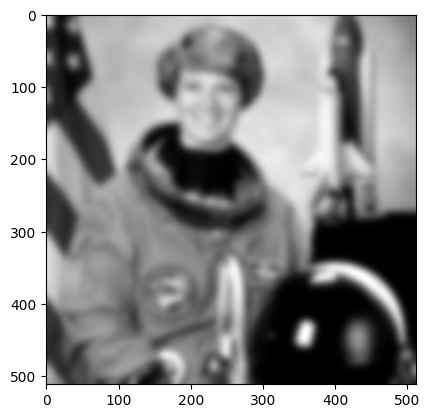

In [71]:
imgg = scipy.ndimage.gaussian_filter(img, 5)
plt.imshow(imgg, 'grey')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [16]:
def fastfilter(img, size):
    # write your code here

SyntaxError: incomplete input (1741712700.py, line 2)

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: